In [ ]:


import math
import json
import librosa
import keras
import numpy as np
from collections import Counter


# Set your constants
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

# Define the function to extract MFCCs from a single audio file
def extract_mfcc(file_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mfcc": []
    }

    samples_per_track = SAMPLE_RATE * TRACK_DURATION
    samples_per_segment = int(samples_per_track / num_segments)
    expected_num_frames = 216  # Number of frames per segment

    # Load audio file
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    # Extract MFCC for each segment
    for segment in range(num_segments):
        start_sample = samples_per_segment * segment
        finish_sample = start_sample + samples_per_segment

        mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                                     sr=sample_rate,
                                     n_fft=n_fft,
                                     n_mfcc=num_mfcc,
                                     hop_length=hop_length)
        mfcc = mfcc.T  # Transpose to match shape (time steps, coefficients)

        # Ensure the shape of MFCC data for this segment matches the expected shape
        if mfcc.shape[0] == expected_num_frames:
            data["mfcc"].append(mfcc.tolist())
        else:
            # If the number of frames does not match, pad or truncate the MFCC data
            if mfcc.shape[0] < expected_num_frames:
                # Padding
                mfcc = np.pad(mfcc, ((0, expected_num_frames - mfcc.shape[0]), (0, 0)), 'constant')
            else:
                # Truncation
                mfcc = mfcc[:expected_num_frames, :]
            data["mfcc"].append(mfcc.tolist())

    return data


# Load the trained model
model = keras.models.load_model('/content/drive/MyDrive/saved_models/music_cnn.h5')


def predict(model, X):
    """
    Predicts the class label for the input data using the trained model.

    Args:
    - model: The trained classifier model
    - X: Input data

    Returns:
    - predicted_label: The predicted class label
    """
    # Perform prediction
    predictions = model.predict(X)
    print('hi')
    print(predictions)
    # Get the index of the class with the highest probability
    predicted_index = np.argmax(predictions, axis=1)
    print('hey')
    return predicted_index


# Define the file path of the audio file
AUDIO_FILE_PATH = "/content/pachh.wav"

# Extract MFCCs from the audio file
extracted_features = extract_mfcc(AUDIO_FILE_PATH)

# Extract the MFCC data
mfcc_data = np.array(extracted_features["mfcc"])

# Add an axis to input data for sample
mfcc_data = mfcc_data[..., np.newaxis]  # Shape: (num_segments, 216, 13, 1)

# Predict the genre
# predict(model, mfcc_data)


# # Predict the genre
# predicted_labels = predict(model, mfcc_data)
# print("Predicted Labels:", predicted_labels)


# Load the mapping
with open('mapping.json', 'r') as f:
    mapping = json.load(f)

# Predict the genre
predicted_labels = predict(model, mfcc_data)

# Map predicted indices to genre labels
predicted_labels = [mapping[str(idx)] for idx in predicted_labels]

print("Predicted Genres:", predicted_labels)
# Count the occurrences of each predicted label
label_counts = Counter(predicted_labels)

# Get the label with the maximum count
max_label = max(label_counts, key=label_counts.get)

print("Predicted Genre:", max_label)



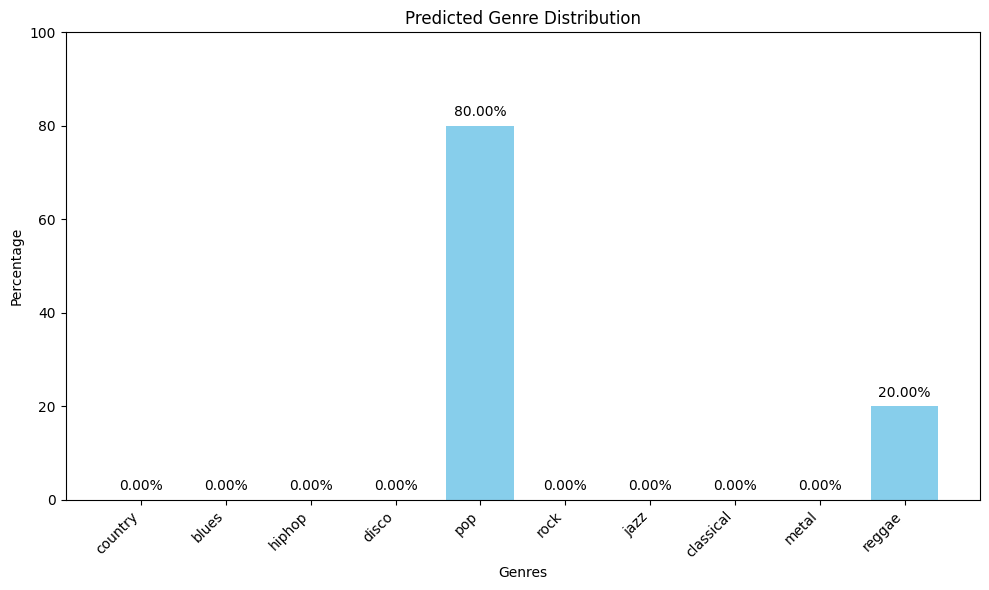

In [ ]:
#To plot graph having all genres distribution

import matplotlib.pyplot as plt

# Define all possible genres
all_genres = [
    "country", "blues", "hiphop", "disco", "pop",
    "rock", "jazz", "classical", "metal", "reggae"
]

# Calculate percentages for each genre
total_samples = len(predicted_labels)
genre_percentages = {genre: label_counts.get(genre, 0) / total_samples * 100 for genre in all_genres}

# Plot the genre distribution
plt.figure(figsize=(10, 6))
plt.bar(genre_percentages.keys(), genre_percentages.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.title('Predicted Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Annotate each bar with its percentage value
for genre, percentage in genre_percentages.items():
    plt.text(genre, percentage + 2, f'{percentage:.2f}%', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
pip install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [ ]:
!pip install keras

In [ ]:
import numpy as np
from collections import Counter
import gradio as gr
import matplotlib.pyplot as plt
import keras
import json
import librosa

# Define all possible genres
all_genres = [
    "country", "blues", "hiphop", "disco", "pop",
    "rock", "jazz", "classical", "metal", "reggae"
]

# Set your constants
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


# Define the function to extract MFCCs from a single audio file
def extract_mfcc(file_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data = {
        "mfcc": []
    }

    samples_per_track = SAMPLE_RATE * TRACK_DURATION
    samples_per_segment = int(samples_per_track / num_segments)
    expected_num_frames = 216  # Number of frames per segment

    # Load audio file
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    # Extract MFCC for each segment
    for segment in range(num_segments):
        start_sample = samples_per_segment * segment
        finish_sample = start_sample + samples_per_segment

        mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                                     sr=sample_rate,
                                     n_fft=n_fft,
                                     n_mfcc=num_mfcc,
                                     hop_length=hop_length)
        mfcc = mfcc.T  # Transpose to match shape (time steps, coefficients)

        # Ensure the shape of MFCC data for this segment matches the expected shape
        if mfcc.shape[0] == expected_num_frames:
            data["mfcc"].append(mfcc.tolist())
        else:
            # If the number of frames does not match, pad or truncate the MFCC data
            if mfcc.shape[0] < expected_num_frames:
                # Padding
                mfcc = np.pad(mfcc, ((0, expected_num_frames - mfcc.shape[0]), (0, 0)), 'constant')
            else:
                # Truncation
                mfcc = mfcc[:expected_num_frames, :]
            data["mfcc"].append(mfcc.tolist())

    return data



def predict(model, X):
    """
    Predicts the class label for the input data using the trained model.

    Args:
    - model: The trained classifier model
    - X: Input data

    Returns:
    - predicted_label: The predicted class label
    """
    # Perform prediction
    predictions = model.predict(X)
    # print('hi')
    print(predictions)
    # Get the index of the class with the highest probability
    predicted_index = np.argmax(predictions, axis=1)
    # print('hey')
    return predicted_index


model = keras.models.load_model('/content/drive/MyDrive/saved_models/music_cnn.h5')


# Define your prediction function
def predict_genre(audio_file_path):
    # Assuming you have functions extract_mfcc, predict, and necessary variables defined elsewhere
    # Extract MFCCs from the audio file
    extracted_features = extract_mfcc(audio_file_path)
    # Extract the MFCC data
    mfcc_data = np.array(extracted_features["mfcc"])
    # Add an axis to input data for sample
    mfcc_data = mfcc_data[..., np.newaxis]  # Shape: (num_segments, 216, 13, 1)

    # Load the mapping
    with open('mapping.json', 'r') as f:
      mapping = json.load(f)

    # Predict the genre
    predicted_labels = predict(model, mfcc_data)

    # Map predicted indices to genre labels
    predicted_labels = [mapping[str(idx)] for idx in predicted_labels]
    print("Predicted Genres:", predicted_labels)
    # Count the occurrences of each predicted label
    label_counts = Counter(predicted_labels)

    # Get the label with the maximum count
    max_label = max(label_counts, key=label_counts.get)
    print("Predicted Genre:", max_label)
    # Calculate percentages for each genre
    total_samples = len(predicted_labels)
    genre_percentages = {genre: label_counts.get(genre, 0) / total_samples * 100 for genre in all_genres}

    return max_label, genre_percentages

# Define Gradio Interface
def audio_interface(audio_file):
    predicted_genre, genre_distribution = predict_genre(audio_file)

    # Create a bar graph showing genre distribution
    genres = list(genre_distribution.keys())
    percentages = list(genre_distribution.values())
    plt.bar(genres, percentages)
    plt.xlabel('Genre')
    plt.ylabel('Percentage')
    plt.title('Genre Distribution')
    plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig("genre_distribution.png")  # Save the plot as an image
    plt.close()  # Close the plot to prevent displaying it

    return predicted_genre, "genre_distribution.png"  # Return the predicted genre and the path to the generated graph

gr.Interface(fn=audio_interface,
             inputs="file",
             outputs=["text", "image"],
             title="Music Genre Prediction",
             description="Upload an audio file and get the predicted genre along with genre distribution percentages.").launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7c5848d3787ded4c4e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 301ms/step
hi
[[1.22742523e-02 1.00198486e-04 2.68474780e-03 2.14876421e-03
  1.28539994e-01 9.18735823e-05 3.34574375e-04 1.96656331e-01
  1.19034623e-04 6.57050133e-01]
 [7.92527385e-03 1.33878540e-03 5.38019638e-04 2.34496524e-03
  9.60428119e-01 7.55790415e-06 2.33366110e-04 2.34597200e-03
  3.48298545e-06 2.48345099e-02]
 [1.42089775e-05 2.43861649e-07 5.84799318e-06 6.19136990e-05
  9.99903440e-01 6.11725426e-09 2.20360448e-07 3.01950718e-06
  6.06830364e-10 1.10869842e-05]
 [5.26570191e-04 5.97840190e-05 4.98507172e-04 6.37956802e-03
  9.90385056e-01 9.53031304e-06 1.52739340e-05 2.94530455e-05
  8.82562517e-07 2.09538662e-03]
 [2.70266555e-05 3.05119116e-04 1.00080587e-03 2.58874439e-04
  9.98382211e-01 1.42699787e-06 8.34124165e-08 2.72702960e-06
  5.61209497e-08 2.16002190e-05]]
hey
Predicted Genres: ['reggae', 'pop', 'pop', 'pop', 'pop']
Predicted Genre: pop
1/1 [==============================] - 0s 41ms/step
hi
[[1.22742523e-02 1.00

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 261, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1786, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1338, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    r

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://7c5848d3787ded4c4e.gradio.live
